# Sentiment Analysis Using Python

Sentiment analysis, also known as opinion mining, is a computational technique used to determine the sentiment or subjective opinion expressed in a piece of text. The Natural Language Toolkit (NLTK) is a popular Python library that provides various tools and resources for natural language processing, including sentiment analysis.

NLTK's sentiment analysis capabilities are often based on the VADER (Valence Aware Dictionary and sEntiment Reasoner) lexicon. VADER is a rule-based sentiment analysis tool specifically designed for social media text and is known for its effectiveness in analyzing sentiment in short, informal texts.

By utilizing NLTK's sentiment analysis functionalities, developers can extract valuable insights from textual data, such as customer reviews, social media posts, or survey responses. The process typically involves tokenizing the text, assigning sentiment scores to individual words, and then aggregating these scores to determine the overall sentiment of the text.

The sentiment scores provided by NLTK can indicate whether the text expresses a positive, negative, or neutral sentiment. These scores are often accompanied by intensity values that reflect the strength of the sentiment.

Sentiment analysis using NLTK can be applied in various domains, such as market research, brand management, social media monitoring, and customer feedback analysis. By understanding the sentiment conveyed in large volumes of text, businesses and organizations can make data-driven decisions, monitor their reputation, and gain insights into customer opinions and preferences.

NLTK's sentiment analysis capabilities, combined with its extensive range of linguistic tools and resources, make it a valuable asset for developers and researchers working with natural language processing tasks, including sentiment analysis. 

In this project, I have performed sentiment analysis on Amazon Fine Food Reviews.

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# reading the data
df = pd.read_csv("Reviews.csv")

# Performing EDA on Data

In [3]:
print(df.shape)

(568454, 10)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None


In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [16]:
df['Score'].value_counts().sort_index()

1     52268
2     29769
3     42640
4     80655
5    363122
Name: Score, dtype: int64

Text(0.5, 0, 'Score')

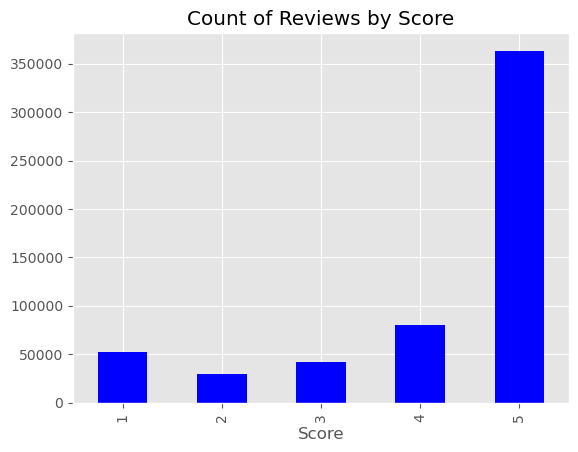

In [89]:
# plotting the above in a graph
ax = df['Score'].value_counts().sort_index().plot(kind='bar',title = 'Count of Reviews by Score',color='blue')
ax.set_xlabel('Score')

# Sentiment Analysis

In [20]:
# Perfroming the Sentiment Analysis
# importing required modules

from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [21]:
sia = SentimentIntensityAnalyzer()

In [22]:
# In the above dataframe, the column named Text is the column that contains the reviews.

# applying the sentimentintensityanalyzer on the dataframe

res={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid]=sia.polarity_scores(text)

  0%|          | 0/568454 [00:00<?, ?it/s]

In [26]:
vaders = pd.DataFrame(res).T

In [27]:
vaders.head()

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468


In [36]:
vaders= vaders.reset_index().rename(columns={'index':'Id'})

In [38]:
#merging it with the dataframe

tdf = vaders.merge(df,how='left')

In [39]:
# total dataframe
tdf

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [42]:
l=[]
for i in tdf['compound']:
    if i==0:
        l.append('Neutral')
    elif i>0:
        l.append('Positive')
    else:
        l.append('Negative')

In [45]:
tdf['Sentiment'] = l

In [46]:
tdf

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Neutral
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,0.072,0.600,0.327,0.8589,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Positive
568450,568451,0.190,0.697,0.114,-0.4848,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,Negative
568451,568452,0.037,0.884,0.078,0.4352,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",Positive
568452,568453,0.041,0.506,0.452,0.9717,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,Positive


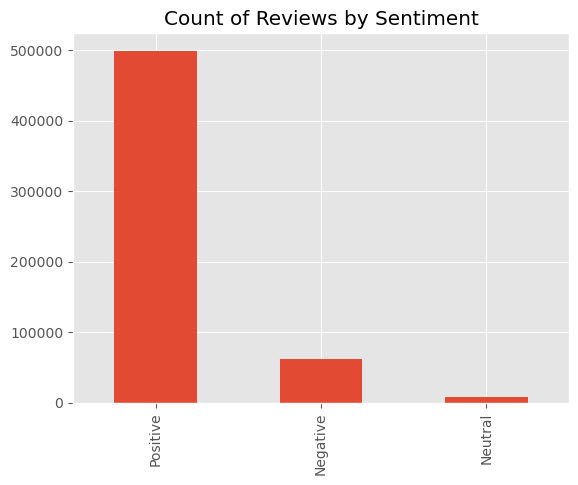

In [77]:
ax = tdf['Sentiment'].value_counts().plot(kind='bar',title = 'Count of Reviews by Sentiment')

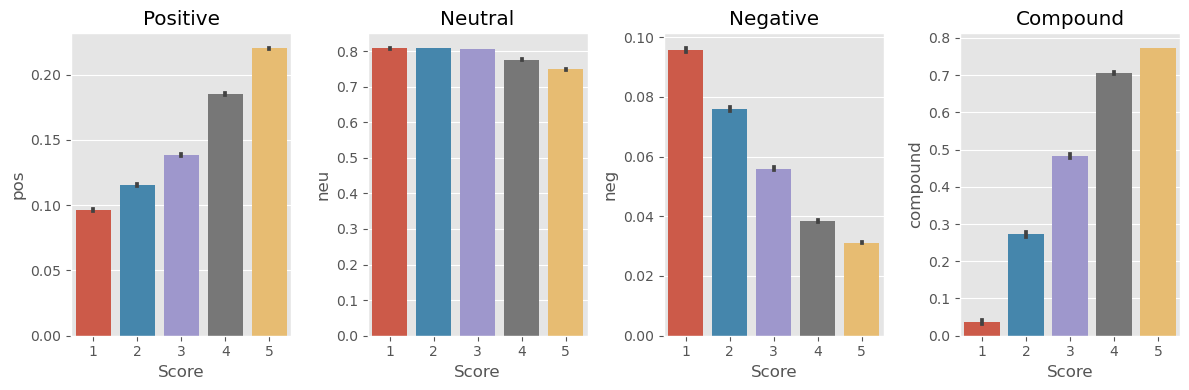

In [57]:
fig, axs = plt.subplots(1, 4, figsize=(12, 4))
sns.barplot(data=tdf, x='Score', y='pos', ax=axs[0])
sns.barplot(data=tdf, x='Score', y='neu', ax=axs[1])
sns.barplot(data=tdf, x='Score', y='neg', ax=axs[2])
sns.barplot(data=tdf, x='Score', y='compound', ax=axs[3])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
axs[3].set_title('Compound')
plt.tight_layout()
plt.show()

In [87]:
# top 3 positive reviews
tdf.sort_values('compound',ascending=False).head(3)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
458123,458124,0.034,0.645,0.320,0.9999,B000CMF196,A2RNUPVSNW1ZXX,Heather Walton,11,23,4,1212796800,Very good if you love blueberries,I have really been into Yogi tea and trying th...,Positive
68700,68701,0.036,0.819,0.146,0.9999,B0051BWU92,A2GZG363BPADYC,Larry Deemer,4,4,5,1323993600,SEARCHING FOR A PET APPETITE ENHANCER?,**********************************************...,Positive
246216,246217,0.033,0.653,0.313,0.9999,B0009F3SBY,A2RNUPVSNW1ZXX,Heather Walton,5,16,4,1212796800,Very good and so healthy!,I have really been into Yogi tea and trying th...,Positive


In [88]:
# top 3 negative reviews
tdf.sort_values('compound',ascending=True).head(3)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
230035,230036,0.150,0.771,0.079,-0.9994,B000WB1YSE,A1FLQ698D9C0C8,G. Zhang,1,4,5,1253923200,Green Tea Ingredient Slows Breast Cancer-Antio...,Green Tea Ingredient Slows Breast Cancer-Antio...,Negative
276019,276020,0.128,0.797,0.075,-0.9985,B000FBMFDO,A5SF5XIV42MW5,Drum 247,7,7,5,1333929600,Works GREAT - you HAVE TO follow the instructi...,Have had serious gopher problems for YEARS. M...,Negative
59774,59775,0.939,0.044,0.017,-0.9985,B001NZW2V6,A3J5IKBQOHNJ8G,"S. Griffith ""truth reader""",0,1,5,1317859200,love them,"These are good but are not sweet! Good, Good, ...",Negative


# The End